# Loading Data from pickled files

In [1]:
import pickle as pkl
import matplotlib.pyplot as plt

#data unpickling
def load_pickle(filename):
    infile = open(filename,'rb')
    data = pkl.load(infile)
    infile.close()
    return data

X_train, y_train = load_pickle('x_train'), load_pickle('y_train')
X_test, y_test = load_pickle('x_test'), load_pickle('y_test')

In [28]:
# the data was processed in obtDataCifar.py 
# RGB div was made (/255)
# y_train and y_test were NOT converted to_Categorical, the conversion happens inside the '''Evaluate_model function'''

In [3]:
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 32, 32, 3)
Train labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [22]:
def count(data):
    l=[0,0,0,0,0,0,0,0,0]
    for i in data:
        for j in range(9):
            if i==j:
                l[j] = l[j]+1
    return(l)

print(count(y_train))
print(count(y_test))

[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]
[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [13]:
# train = 5000*10 , test = 1000*10
#Data is shaped and prepared 

# Presentation

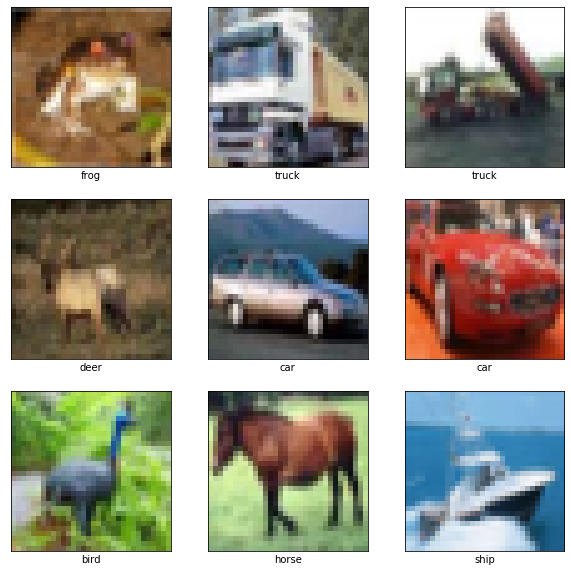

In [14]:
import matplotlib.pyplot as plt

class_names = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
plt.figure(figsize=(10,10))
for i in range(9):
    # define subplot
    plt.subplot(3, 3, i+1)
    # plot raw pixel data
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()

# Libraries

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split as tts
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16


# Prep and Eval functions

In [15]:
#load datasets
def load_datasets():
    return (load_pickle('x_train'), load_pickle('y_train'), load_pickle('x_test'), load_pickle('y_test'))

In [23]:
#evaluation
def evaluate_model(model):
    X_train, y_train, X_test, y_test = load_datasets()
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    print('Train: X=%s, Y=%s' % (X_train.shape, y_train.shape))
    print('Test: X=%s, Y=%s' % (X_test.shape, y_test.shape))
    print('MODEL SUMMARY')
    try:
        model.summary()
    except:
        print('Sorry!! No summary')
    
    print("HISTORY :)")
    history = model.fit(X_train,y_train,epochs = 10,batch_size = 64,validation_data = (X_test, y_test),verbose = 0)
    _, acc = model.evaluate(X_test, y_test, verbose=0)
    print('acc ==> %.3f' % (acc * 100.0))
        
    # plot loss
    plt.subplot(2,1,1)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(2,1,2)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.show()
    # Evaluate the model.
    print("evaluate model")
    model.evaluate(
    X_test,
    y_test)

# Models

In [21]:
opt = SGD(lr= 0.001, momentum=0.9)

In [47]:
def model1():
    
    model = Sequential()
    model.add(Flatten(input_shape=(32,32,3)))
    model.add(Dense(3000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics ='accuracy')
    
    return model

Train: X=(50000, 32, 32, 3), Y=(50000,)
Test: X=(10000, 32, 32, 3), Y=(10000,)
MODEL SUMMARY
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 3000)              9219000   
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              3001000   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________
HISTORY :)
Epoch 1/10
782/782 - 208s - loss: 1.8506 - accuracy: 0.3455 - val_loss: 1.7115 - val_accuracy: 0.4087
Epoch 2/10
782/782 - 86s - loss: 1

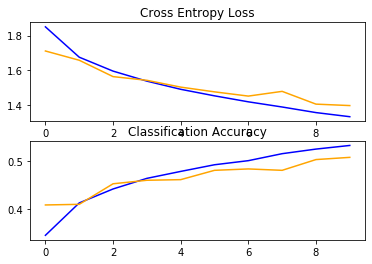

evaluate model
313/313 [==============================] - 8s 25ms/step - loss: 1.3971 - accuracy: 0.5078 0s - loss:


In [48]:
model = model1()
evaluate_model(model)

In [24]:
def vgg_1block():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Flatten())
    model.add(Dense(128, kernel_initializer = 'he_uniform', activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Train: X=(50000, 32, 32, 3), Y=(50000, 10)
Test: X=(10000, 32, 32, 3), Y=(10000, 10)
MODEL SUMMARY
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,060,1

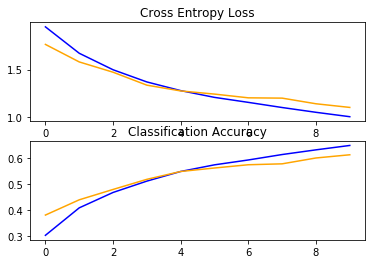

evaluate model
313/313 [==============================] - 8s 26ms/step - loss: 1.1038 - accuracy: 0.6130


In [25]:
model = vgg_1block()
evaluate_model(model)

In [26]:
def vgg_2blocks():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Flatten())
    model.add(Dense(128, kernel_initializer = 'he_uniform', activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Train: X=(50000, 32, 32, 3), Y=(50000, 10)
Test: X=(10000, 32, 32, 3), Y=(10000, 10)
MODEL SUMMARY
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_____________________

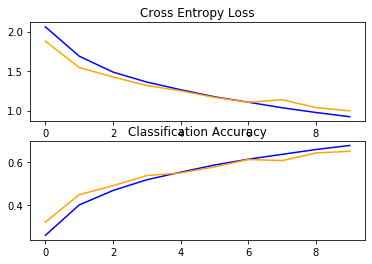

evaluate model
313/313 [==============================] - 22s 71ms/step - loss: 0.9960 - accuracy: 0.6503


In [27]:
model = vgg_2blocks()
evaluate_model(model)

In [28]:
def vgg_3blocks():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Flatten())
    model.add(Dense(128, kernel_initializer = 'he_uniform', activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Train: X=(50000, 32, 32, 3), Y=(50000, 10)
Test: X=(10000, 32, 32, 3), Y=(10000, 10)
MODEL SUMMARY
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_____________________

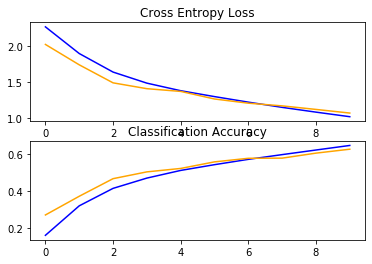

evaluate model
313/313 [==============================] - 20s 63ms/step - loss: 1.0682 - accuracy: 0.6251


In [29]:
model = vgg_3blocks()
evaluate_model(model)

In [ ]:
# PC unable to complete training
def cnn3_w_dropout():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(128, kernel_initializer = 'he_uniform', activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = cnn3_w_dropout()
evaluate_model(model)

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
# PC Unable to complete running
def cnn3_w_dp_batchnorm():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer = 'he_uniform', activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(128, kernel_initializer = 'he_uniform', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = cnn3_w_dp_batchnorm()
evaluate_model(model)

# VGG Pretrained Model

In [26]:
# Loading Base Model (pretrained)
base_model = VGG16(input_shape = (32, 32, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

#Compiling and fitting our model

# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = Dense(10, activation='softmax')(x)

model = Model(base_model.input, x)

model.compile(optimizer = opt, loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [16]:
X_train, y_train, X_test, y_test = load_datasets()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Train: X=%s, Y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, Y=%s' % (X_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), Y=(50000, 10)
Test: X=(10000, 32, 32, 3), Y=(10000, 10)


In [17]:
(X_train, X_val, y_train, y_val) = tts(X_train, y_train, test_size =0.1, random_state=3)

print('Train: X=%s, Y=%s' % (X_train.shape, y_train.shape))
print('Val: X=%s, Y=%s' % (X_val.shape, y_val.shape))

Train: X=(45000, 32, 32, 3), Y=(45000, 10)
Val: X=(5000, 32, 32, 3), Y=(5000, 10)


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

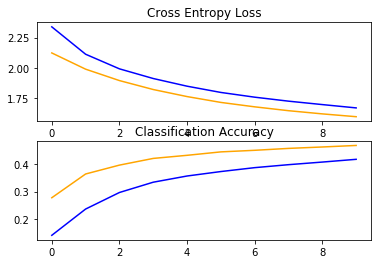

evaluate model
313/313 [==============================] - 153s 489ms/step - loss: 1.6074 - accuracy: 0.4553


[1.607412338256836, 0.4553000032901764]

In [27]:
model.summary()
print("HISTORY :)")
history = model.fit(X_train,y_train,epochs = 10,steps_per_epoch = 100,validation_data = (X_val, y_val),verbose = 1)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('acc ==> %.3f' % (acc * 100.0))
        
# plot loss
plt.subplot(2,1,1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(2,1,2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()
# Evaluate the model.
print("evaluate model")
model.evaluate(
X_test,
y_test)

# Conclusion

## the best Model is the 2-Blocks-VGG (cnn2) with 65% accuracy
## Due to difficulties my machine is facing while fitting these model, they were not completely trained, so using 100+ epochs for fitting and an EarlyStopping will get us better results
## VGG16 model also needs bigger training dataset so for better results we will need to use datagen to generate a larger set of data so we can better train it